# Mean Square Error (MSE) Loss

In [1]:
import torch

N개(Instance 개수)에 대해서 계산하니까 MSE 수식이 아래와 같음. 원래는 MSE가
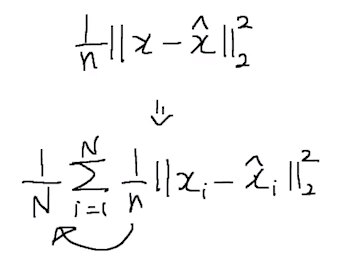

$$
\text{MSE}(\hat{x}_{1:N}, x_{1:N})=\frac{1}{N\times{n}}\sum_{i=1}^{N}{||x_i-\hat{x}_i||_2^2}
$$

In [2]:
def mse(x_hat, x):
    # |x_hat| = (batch_size, dim)
    # |x| = (batch_size, dim)
    y = ((x - x_hat)**2).mean()
    
    return y

In [3]:
x = torch.FloatTensor([[1, 1],
                       [2, 2]])
x_hat = torch.FloatTensor([[0, 0],
                           [0, 0]])

print(x.size(), x_hat.size())

torch.Size([2, 2]) torch.Size([2, 2])


In [4]:
mse(x_hat, x)

tensor(2.5000)

## Predefined MSE in PyTorch

torch.nn.functional에 있는 거를 쓰거나 torch.nn에 있는 거를 쓰거나 두 가지 방법이 있음. (강사님은 아래 방법을 주로 쓴다고 하심)
- 차이: 위에 방법은 함수를 가져와서 쓰는 거, 아래 방법은 객체를 불러와서 쓰는 거

In [5]:
import torch.nn.functional as F

In [6]:
F.mse_loss(x_hat, x) # Default로 reduction = 'mean'이 되어있음

tensor(2.5000)

In [7]:
F.mse_loss(x_hat, x, reduction='sum') # 2x2 행렬에서 element-wise로 mse 구한 다음 합을 구한 거

tensor(10.)

In [8]:
F.mse_loss(x_hat, x, reduction='none') # reduction = 'none'은 차원 축소를 하지 않겠다는 뜻

tensor([[1., 1.],
        [4., 4.]])

In [9]:
import torch.nn as nn

In [10]:
mse_loss = nn.MSELoss()

mse_loss(x_hat, x)

tensor(2.5000)